In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn import metrics

In [2]:
# the dataset is in a txt file and is being imported from the following url. but i still downloaded the file 
# so you can take a look at the data
data_url = "http://lib.stat.cmu.edu/datasets/boston"
## ignoring first 22 rows then retrievving the 14 columnar data which are seperated by space
raw_df = pd.read_csv(data_url, sep= r'\s+' ,skiprows=22, header=None) 
# then stacking them horizontally
data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :3]])
# storing the last column as target
# target = raw_df.values[1::2, 2]

In [3]:
print(data.shape)#, target.shape)

(506, 14)


In [4]:
# now our data does not have any heading so we add column names
columns = [
    'CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE',
    'DIS', 'RAD', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV'
]
houseDF = pd.DataFrame(data, columns = columns)

In [7]:
houseDF.head(), houseDF.shape

(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
 1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
 2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
 3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
 4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
 
    PTRATIO       B  LSTAT  MEDV  
 0     15.3  396.90   4.98  24.0  
 1     17.8  396.90   9.14  21.6  
 2     17.8  392.83   4.03  34.7  
 3     18.7  394.63   2.94  33.4  
 4     18.7  396.90   5.33  36.2  ,
 (506, 14))

In [9]:
houseDF.isna().sum()
# no missing values

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
MEDV       0
dtype: int64

In [10]:
houseDF.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  MEDV     506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


In [13]:
# getting statistical measures
houseDF.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


# Finding Correlatin Between features of the data
Correlation refers to each features reacts to increase or decrease in other features
### Types of Correlation
1. Positive Correlation : When both features move in similar direction
2. Negative Correlation : When both features move in opposite direction

In [18]:
# understanding correlation between features
correlation = houseDF.corr() 

<Axes: >

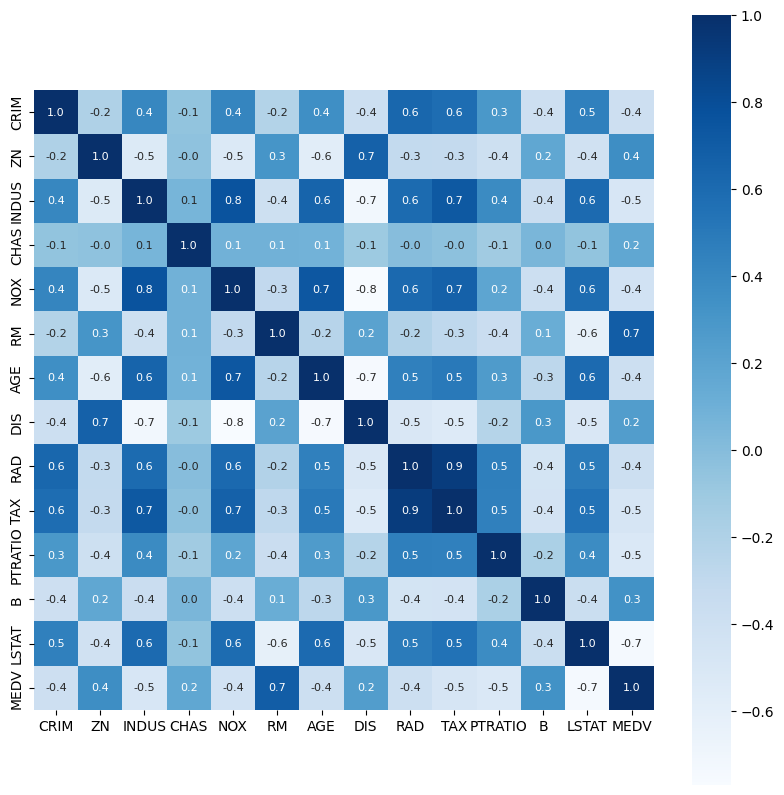

In [19]:
plt.figure(figsize = (10,10))
sns.heatmap(
            correlation, # the correlation info
            cbar = True, # show the side range bar
            square = True, # square diagram
            fmt = '.1f', # no. of digits after decimal point.
            annot = True, # annotate the columns and rows
            annot_kws = {'size':8}, # text size in the annotations
            cmap = 'Blues', # color 
           )

In [20]:
# splitting target from data
X = houseDF.drop(columns = "MEDV", axis = 1)
Y = houseDF["MEDV"]

In [21]:
X.head(), Y.head()

(      CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
 0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
 1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
 2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
 3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
 4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   
 
    PTRATIO       B  LSTAT  
 0     15.3  396.90   4.98  
 1     17.8  396.90   9.14  
 2     17.8  392.83   4.03  
 3     18.7  394.63   2.94  
 4     18.7  396.90   5.33  ,
 0    24.0
 1    21.6
 2    34.7
 3    33.4
 4    36.2
 Name: MEDV, dtype: float64)

In [23]:
X.shape, Y.shape

((506, 13), (506,))

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size = 0.2, random_state = 2)

In [24]:
X_train.shape, X_test.shape, Y_train.shape, Y_test.shape

((404, 13), (102, 13), (404,), (102,))

# Model TRaining

In [25]:
model = XGBRegressor()

In [36]:
model.fit(X_train, Y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=None, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=None,
             n_jobs=None, num_parallel_tree=None, ...)

### Evaluation

In [37]:
train_prediction = model.predict(X_train)

In [38]:
print(train_prediction)

[23.112196  20.992601  20.10438   34.67932   13.920501  13.499354
 21.998383  15.206723  10.89543   22.67402   13.795236   5.602332
 29.808502  49.98666   34.89634   20.594336  23.388903  19.2118
 32.69294   19.604128  26.978151   8.405952  46.00062   21.70406
 27.084402  19.372278  19.297894  24.79984   22.608278  31.707775
 18.53683    8.703393  17.40025   23.698814  13.29729   10.504759
 12.693588  24.994888  19.694864  14.911037  24.20254   24.991112
 14.901547  16.987965  15.592753  12.704759  24.505623  15.007718
 49.999355  17.509344  21.18844   31.999287  15.606071  22.902134
 19.309835  18.697083  23.302961  37.19767   30.102247  33.117855
 20.993683  50.00471   13.40048    5.002565  16.50862    8.4016905
 28.651423  19.49218   20.595366  45.404697  39.808857  33.4055
 19.81498   33.406376  25.30206   49.998615  12.544487  17.433802
 18.602612  22.601418  50.004013  23.814182  23.313164  23.097467
 41.71243   16.112017  31.604454  36.09397    7.0009975 20.406271
 19.992195  12

In [39]:
# using R Squared error to find the cost
score_train_r = metrics.r2_score(Y_train, train_prediction)

# usng mean absolute error to fint the cost
score_train_ma = metrics.mean_absolute_error(Y_train, train_prediction)

# using mean Squared error to find the  cost
score_train_mse = metrics.mean_squared_error(Y_train, train_prediction)

In [40]:
print("R Squared Error: ", score_train_r)
print("Mean Abslute Error: ", score_train_ma)
print("Mean Squared Error: ", score_train_mse)

R Squared Error:  0.9999980039471451
Mean Abslute Error:  0.0091330346494618
Mean Squared Error:  0.00016880599071692853


In [41]:
test_prediction = model.predict(X_test)

In [42]:
# using R Squared error to find the cost
score_test_r = metrics.r2_score(Y_test, test_prediction)

# usng mean absolute error to fint the cost
score_test_ma = metrics.mean_absolute_error(Y_test, test_prediction)

# using mean Squared error to find the  cost
score_test_mse = metrics.mean_squared_error(Y_test, test_prediction)

In [43]:
print("R Squared Error: ", score_test_r)
print("Mean Abslute Error: ", score_test_ma)
print("Mean Squared Error: ", score_test_mse)

R Squared Error:  0.9051721149855378
Mean Abslute Error:  2.0748727686264927
Mean Squared Error:  7.9332706911154185


## Visualizing the predictions with actual Ground Truth

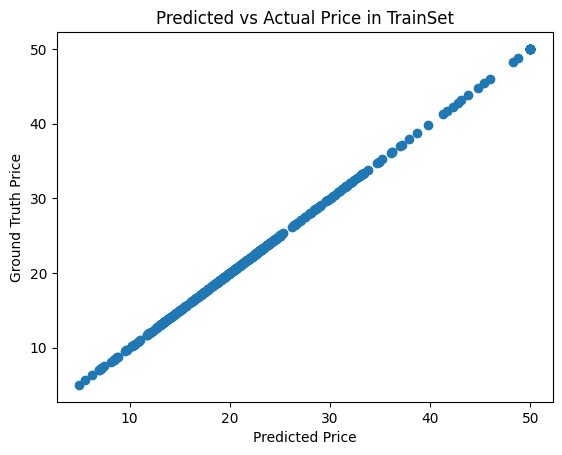

In [47]:
plt.scatter(Y_train, train_prediction)
plt.ylabel("Ground Truth Price")
plt.xlabel("Predicted Price")
plt.title("Predicted vs Actual Price in TrainSet")
plt.show()

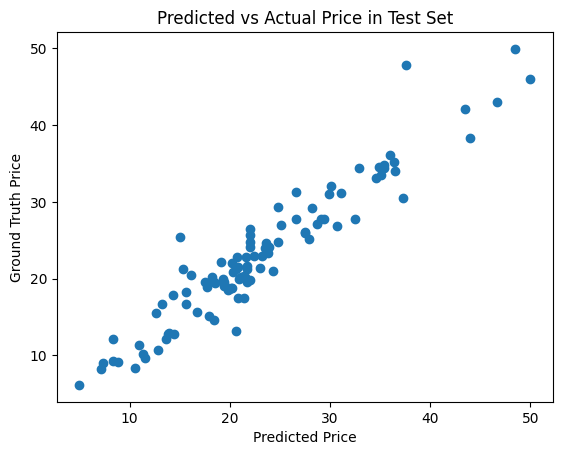

In [48]:
plt.scatter(Y_test, test_prediction)
plt.ylabel("Ground Truth Price")
plt.xlabel("Predicted Price")
plt.title("Predicted vs Actual Price in Test Set")
plt.show()

# Observation
- We found that the cost with test set is high, which means we have overfitted our model to the train data
# Solution
To solve we can bring in more data to train